In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [46]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [47]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,250.500,316.472,107.192,3.114,3.374,3.484,8.576,0.560,0.722
std,144.482,11.295,6.082,1.144,0.991,0.925,0.605,0.497,0.141
min,1.000,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,125.750,308.000,103.000,2.000,2.500,3.000,8.127,0.000,0.630
50%,250.500,317.000,107.000,3.000,3.500,3.500,8.560,1.000,0.720
75%,375.250,325.000,112.000,4.000,4.000,4.000,9.040,1.000,0.820
max,500.000,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


Dropping Serial No. column:

In [48]:
df.drop(labels='Serial No.', axis=1, inplace=True)

Plotting correlation for all the variables:

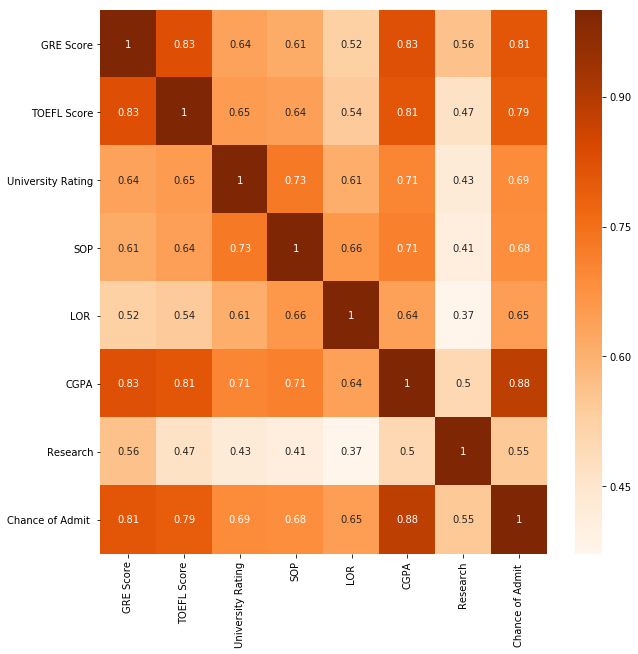

In [42]:
plot_axis = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')

From the above plot we can conclude that GRE Score, TOEFL Score and CGPA have a strong correlation with Chance of Admits

Isolating GRE Score data:

In [26]:
GRE = pd.DataFrame(df['GRE Score'])
GRE.describe()

,GRE Score
count,500.000
mean,316.472
std,11.295
min,290.000
25%,308.000
50%,317.000
75%,325.000
max,340.000


Isolating TOEFL Score data:

In [27]:
TOEFL = pd.DataFrame(df['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,500.000
mean,107.192
std,6.082
min,92.000
25%,103.000
50%,107.000
75%,112.000
max,120.000


Isolating CGPA data:

In [28]:
CGPA = pd.DataFrame(df['CGPA'])
CGPA.describe()

,CGPA
count,500.000
mean,8.576
std,0.605
min,6.800
25%,8.127
50%,8.560
75%,9.040
max,9.920


Plotting distribution of GRE, TOEFL and CGPA score:

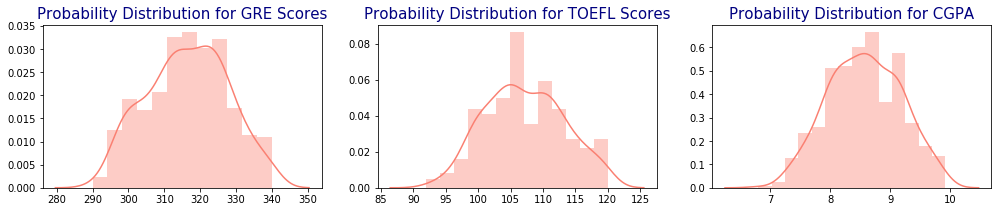

In [95]:
plt.figure(figsize=(17,3))

plt.subplot(1,3,1)
sns.distplot(GRE, color = 'salmon').set_title('Probability Distribution for GRE Scores', size=15, color='navy')
plt.plot()

plt.subplot(1,3,2)
sns.distplot(TOEFL, color = 'salmon').set_title('Probability Distribution for TOEFL Scores', size=15, color='navy')
plt.plot()

plt.subplot(1,3,3)
sns.distplot(CGPA, color = 'salmon').set_title('Probability Distribution for CGPA', size=15, color='navy')
plt.plot()

plt.show()

Plotting University Ranking vs Number of applications:

Text(0, 0.5, 'Number of Applicants')

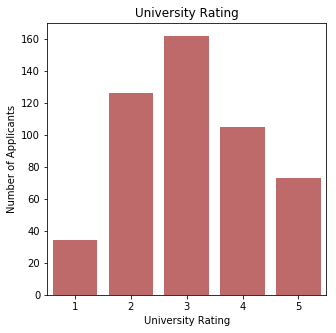

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(df['University Rating'], color='indianred')
plt.title('University Rating')
plt.ylabel('Number of Applicants')

Plotting GRE, TOEFL, CGPA vs University Ranking:

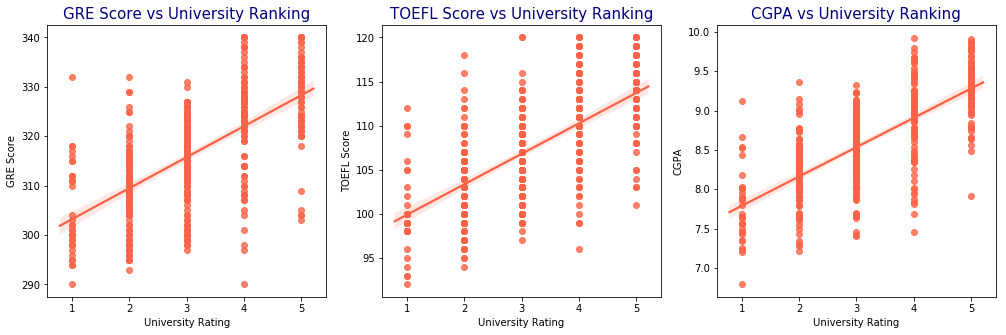

In [94]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
fig = sns.regplot(x=df["University Rating"], y=df["GRE Score"], color='tomato')
plt.title("GRE Score vs University Ranking", size=15, color='navy')
plt.plot()

plt.subplot(1,3,2)
fig = sns.regplot(x=df["University Rating"], y=df["TOEFL Score"], color='tomato')
plt.title("TOEFL Score vs University Ranking", size=15, color ='navy')
plt.plot()

plt.subplot(1,3,3)
fig = sns.regplot(x=df["University Rating"], y=df["CGPA"], color='tomato')
plt.title("CGPA vs University Ranking", size=15, color='navy')
plt.plot()

plt.show()

Above plots show that GRE Score plays a major role in admission of a higher ranking university copared to CGPA and TOEFL Score

In [74]:
# Split data train & test
X = df.drop(['Chance of Admit '], axis=1)
Y = df['Chance of Admit ']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, shuffle=False, random_state=42)

Data contains float values for chance to admit', converting into binary values, accepted and not accepted.

In [75]:
mean_chance = df['Chance of Admit '].mean()

In [76]:
y_train_binary = (Y_train > 0.72).astype(int)
y_test_binary = (Y_test > 0.72).astype(int)

Decision Tree Prediction:

In [78]:
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train_binary)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test_binary))*100
dec_tree_score

89.33333333333333

Random Forest Prediction:

In [81]:
forest = RandomForestClassifier(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train_binary)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test_binary))*100
forest_score

91.33333333333333

Random Forest Algorithm gives the highest prediction accuracy which can be used to predict the future applications